# Diffusion Limited Aggregation
##### Alex Negron

## 1. Spawning random walkers on concentric circles

This is the first implementation attempt. Here, the algorithm is as follows: 
1. Draw $N \times N$ lattice 
2. Spawn seed particle at the center of the lattice which is position $(N/2, N/2)$
3. Draw a "launch" circle at a small radius $r$ centered on the seed particle 
4. Fix a "bounding" circle at a larger radius $R$ centered on the seed particle
5. Spawn a random walker on the launch circle and let it follow a random walk. This walker is allowed to take steps of unit size to the left, right, up, or down. The direction of a step is chosen uniformly from 1-4, each integer corresponding to one of the four possible step directions. The walker walks until it is either adjacent to the seed particle (omitting diagonal adjacency), or reaches one of lattice edges. If adjacent to the seed particle, the walker "freezes" in place, "stuck" to the seed particle. 
6. If the distance from the newly stuck particle to the seed exceeds $r$, increment $r$. This $r$ is intended to represent the distance from the seed to the most distant particle in the cluster.
7. Release a second particle on the launch circle which walks according to (5).
8. Repeat (3)-(7) until the cluster reaches the bounding circle of radius $R$, at which point the process is complete.
9. Print the resulting cluster. 

Most other implementations I've come across fix $r$ and continue generating walkers on this launch circle. I've found that generating walkers on circles close to the cluster improves the rate of the cluster's growth. Hence, at each iteration, walkers are spawned as close as possible to the cluster. 

Here is a cluster of 50,000 particles grown according to this algorithm on a $10^4 \times 10^4$ lattice: 
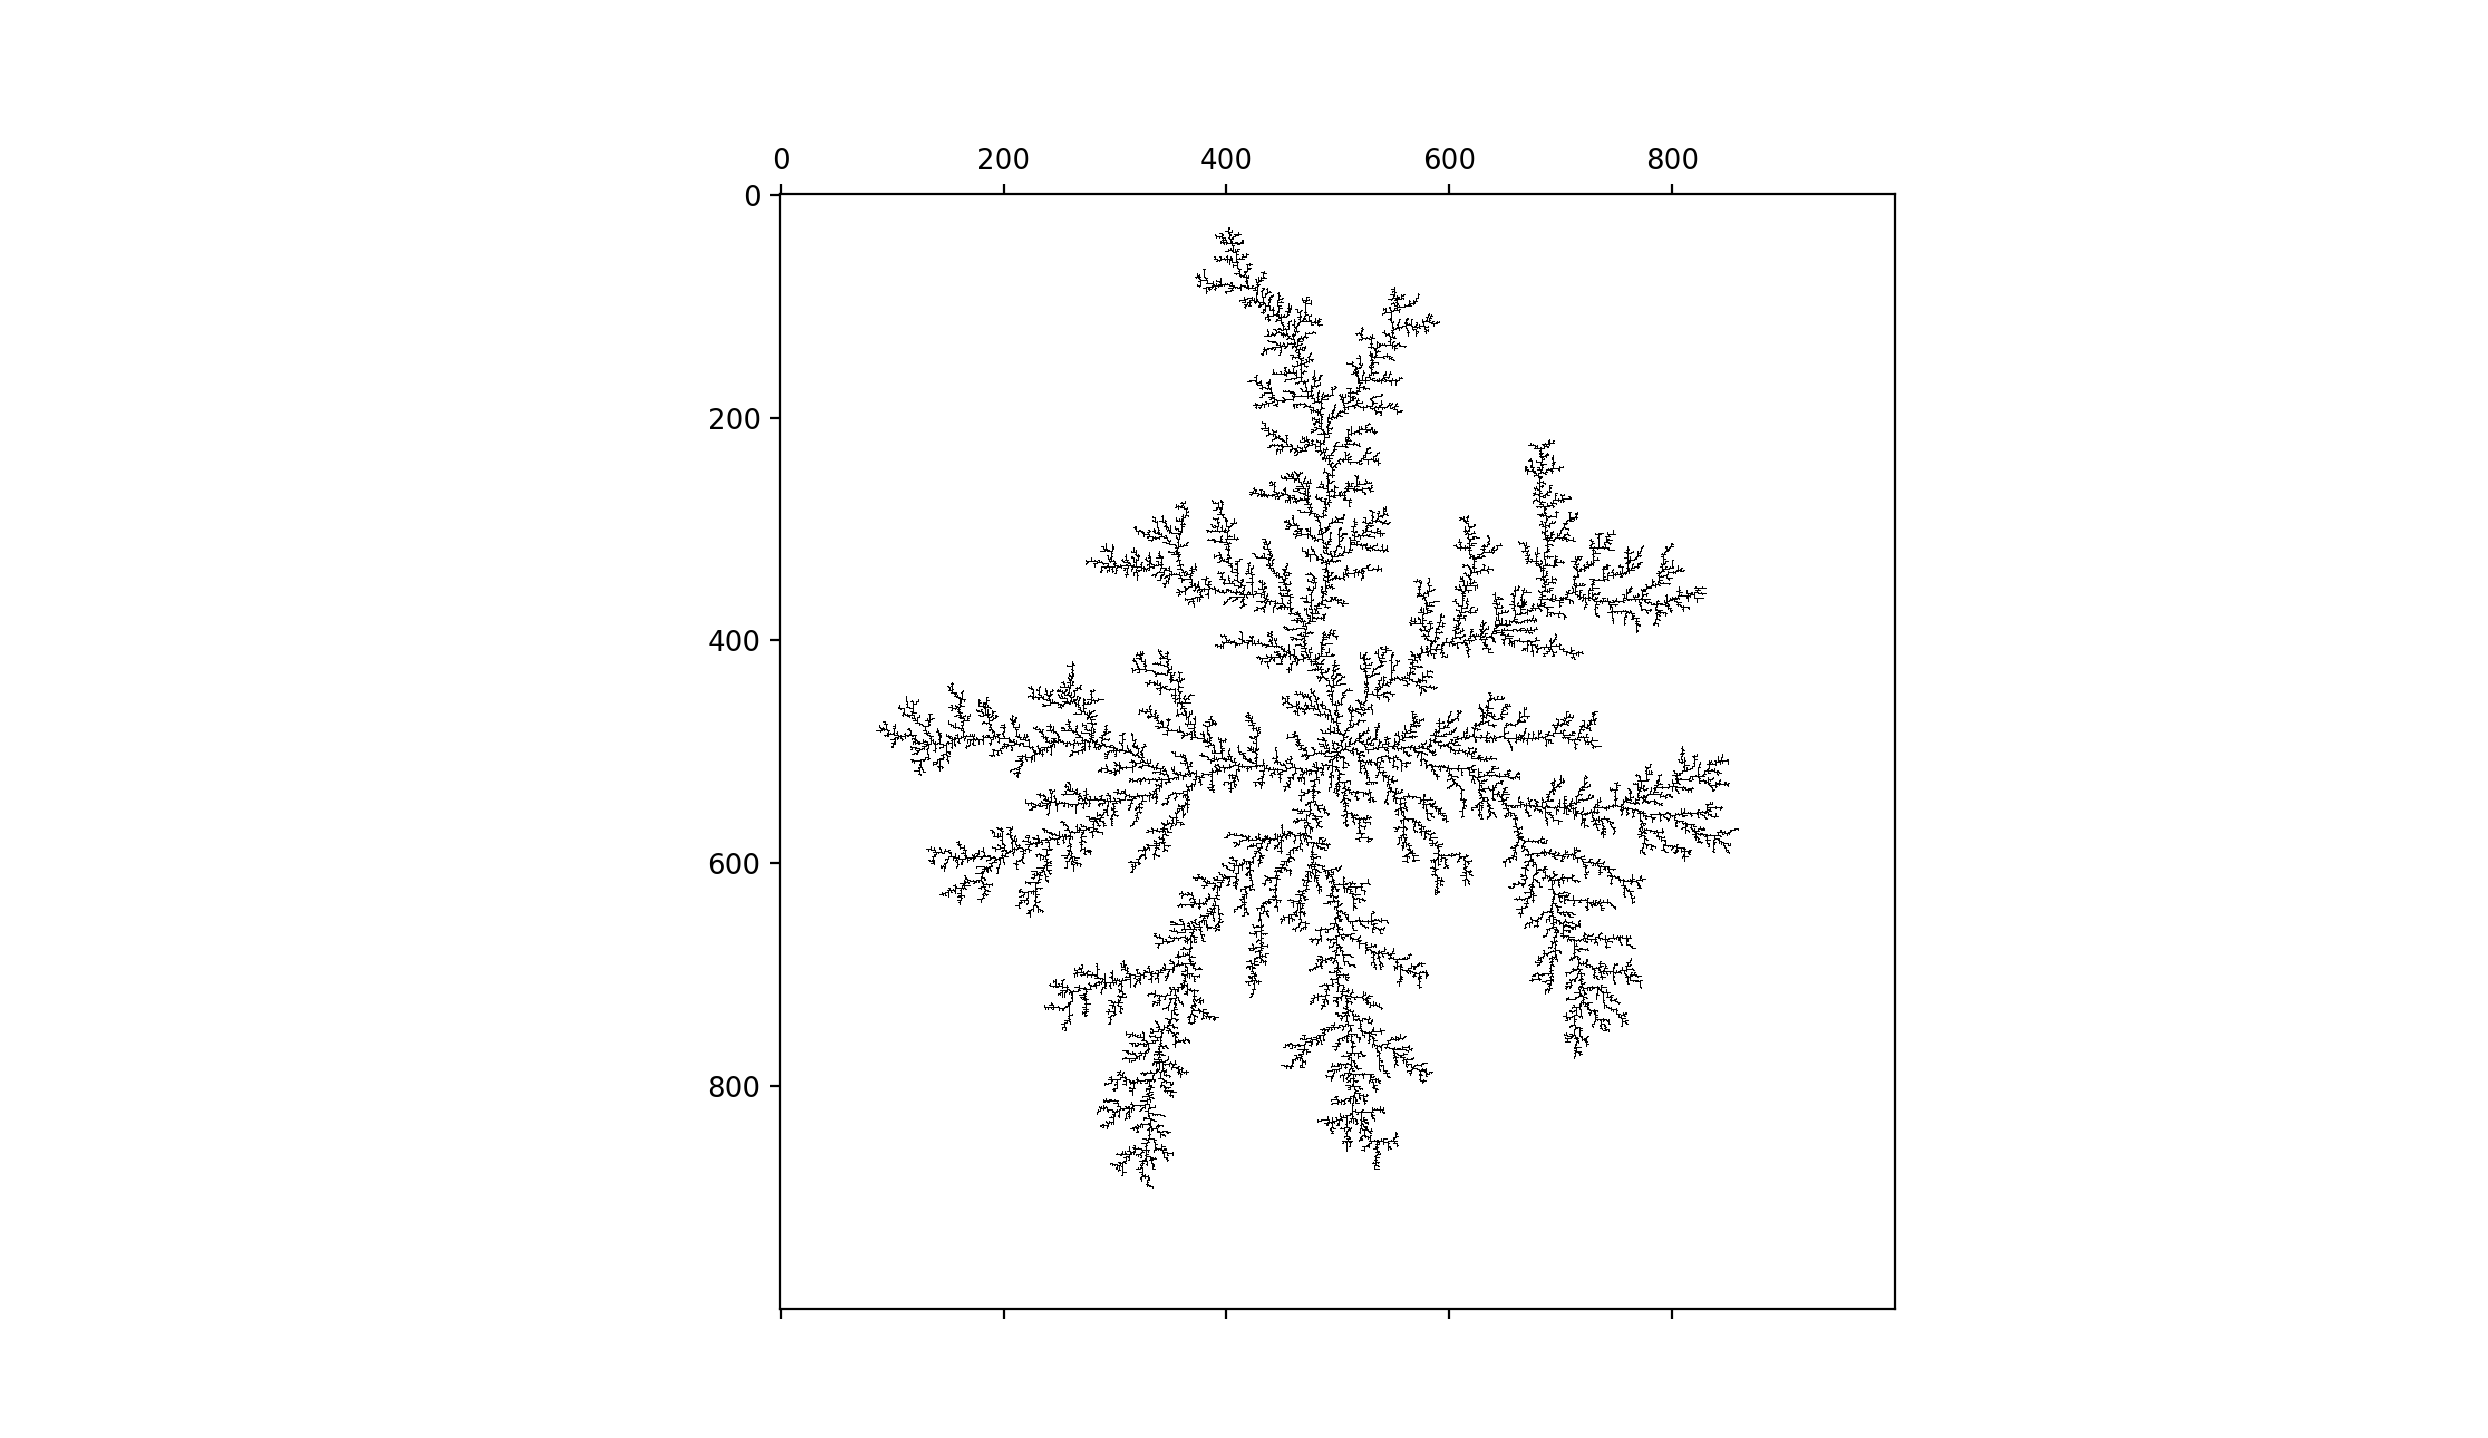

This algorithm *is not fast.* The cluster above took about 4 hours to make. I suspect several possible reasons that contribute to the sluggishness of this implementation: 
* Several computations of Euclidean distance. Even though square roots have been eliminated, I'm not confident that this is running as quickly as it could be.
* No good way to limit a walker's walk! As of now, once a walker is launched, it is pretty much allowed to do whatever it wants, for as long as it wants. A single walk may involve thousands of steps until it either hits a particle already in the cluster, or hits the boundary of the lattice. 
    * I've attempted several ways of limiting random walks: 
        * One way was to cap the amount of steps the random walk may take before scrapping it and launching a new particle. This method did not produce the cluster desired (instead, it results in a sort of straight branch that shoots off in a random angle until it hits the bounding circle). 
        * Another way was to make a "kill" circle that coincided with each concentric launch circle. Once a walker launched, if it drifted out of the circle it spawned on, it was killed and a new walker launched again on the circle at a different position. This had the same outcome as the bullet above. Similarly, I tried making the radius $r^*$ of the kill circle larger than the radius $r$ of the launch circle, and allowed it to scale with $r$, so that as $r$ incremented, so too did $r^*$. This did not seem to have any significant performance improvements, and there does not seem an obvious way to figure out what is the appropriate scaling for $r^*$. If this radius is too small, we get the wrong result. If it's too large, it does nothing. How to choose the appropriate $r^*$, and how should it scale with respect to $r$? (which can be seen as the "radius of the cluster")

Libraries used: 

In [1]:
from math import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors
import random

`check_near(pos, N, matrix)`  This function is designed to take the current position of a walker and check the positions adjacent to it. It checks to see if the walker is at the edge of the lattice and checks to see if the walker has come into a position adjacent to a cluster particle. Returns booleans for each of these checks.

In [8]:
def check_near(pos, N, matrix):
    stickWalker = False
    atLatticeEdge = False
    
    if(pos[0]+1 >= N or pos[0]-1 <= 0       # check if pos is anywhere along the edge of board
       or pos[1] +1 >= N or pos[1]-1 <= 0):
        atLatticeEdge = True
    
    
    if not atLatticeEdge:                          # if not at edge, check the adjacent positions to see if walker position is next to a particle currently in the cluster 
        posDown = matrix[pos[1]+1, pos[0]]  
        posUp = matrix[pos[1]-1, pos[0]]
        posRight = matrix[pos[1], pos[0]+1]
        posLeft = matrix[pos[1], pos[0]-1]
        if posDown == 1 or posUp == 1 or posRight == 1 or posLeft == 1:
            stickWalker = True
    
    return(atLatticeEdge, stickWalker)

`walk(pos, N, matrix)` This function takes the current position of a walker and decides where it should take its next step. Returns the updated position after the step has been taken.

In [9]:
def walk(pos, N, matrix):
    atLatticeEdge, stickWalker = check_near(pos, N, matrix)
    
    if not atLatticeEdge and not stickWalker:   # if the walker is not currently at the edge and is not currently 
        decision = random.randint(1,4)     # stuck to the cluster, take a random step in one of 4 directions 
        
        if decision == 1:
            pos = [pos[0]+1, pos[1]]
        elif decision == 2: 
            pos = [pos[0]-1, pos[1]]
        elif decision == 3: 
            pos = [pos[0], pos[1]+1]
        elif decision == 4:
            pos = [pos[0], pos[1]-1]
    
    return pos

`random_on_circle(seed, r)` : Generates a location $(x,y)$ uniformly at random on the circumference of a circle of radius $r$ from the seed particle.

In [10]:
def random_on_circle(seed, r):
    theta = random.random() * 2 * pi
    x = int(seed[0] + cos(theta) * r)
    y = int(seed[1] + sin(theta) * r)
    return x,y

Now let's implement these functions and use them to simulate DLA. 

To visualize the clusters, the idea is to first initialize an $N \times N$ matrix of 0s. Put 1s at locations in the lattice which correspond to particles in the cluster. Then, determine a "bounding radius" for the cluster. Once the cluster reaches this bounding radius, we say the cluster has finished growing and is complete. To represent this in the matrix, we put 2s everywhere outside this bounding circle. As the algorithm runs, the matrix is filled with 1s. Then, the matrix is printed via the `matshow` function where 0s and 2s are colored as white, and 1s are colored black.

Still working.  1  walkers have been released. Added:  1
Still working.  151  walkers have been released. Added:  117
Still working.  301  walkers have been released. Added:  242
Still working.  451  walkers have been released. Added:  365
Still working.  601  walkers have been released. Added:  479
Still working.  751  walkers have been released. Added:  601
Still working.  901  walkers have been released. Added:  708
Still working.  1051  walkers have been released. Added:  821
Still working.  1201  walkers have been released. Added:  931
Still working.  1351  walkers have been released. Added:  1036
Still working.  1501  walkers have been released. Added:  1146
Still working.  1651  walkers have been released. Added:  1251
Still working.  1801  walkers have been released. Added:  1360
Still working.  1951  walkers have been released. Added:  1477
Still working.  2101  walkers have been released. Added:  1573
Still working.  2251  walkers have been released. Added:  1683
Still workin

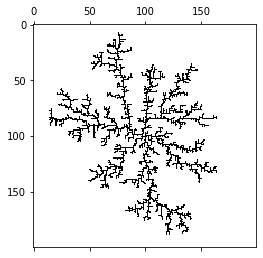

In [43]:
N = 200 # this can be changed. 200x200 lattice takes about 2-3 minutes to make a complete cluster
bounding_radius = 95 
r = 2 # first circle is set to a radius of 2 around the seed particle; this is the first circle on which we generate a random walker
matrix = np.zeros((N,N))

matrix[100][100] = 1 # seed location at the center of grid
seed = (100, 100)

# this loop puts a 2 at all positions more than the bounding radius away from the seed point
for row in range(0, N):
    for col in range(0, N):
        if (seed[0] - col)**2 + (seed[1]-row)**2 > (bounding_radius)**2:  # ordinary distance function, written to avoid taking square roots
            matrix[row][col] = 2
            
cmap = colors.ListedColormap(['white', 'black', 'white']) # this colors the 0s, 1s, and 2s in the matrix

clusterComplete = False   # boolean for when cluster is completed. Cluster is complete once it hits the bounding circle 

addedCount = 0

while not clusterComplete:
    
    # need to update r each time : find the particle in the cluster at this iteration that is farthest from 
    # the seed particle. The distance between the seed and this farthest particle is the new radius of the 
    # circle on which we will spawn the next random walker
    
    walkerPos = random_on_circle(seed, r) # release a walker at a random position on the circle of radius r
    walkerCount += 1
    
    walkerStuck = False
    walkerAtEdge = False
    walkerTooFar = False
    
    while not walkerStuck and not walkerAtEdge and not walkerTooFar: # this is the loop that controls the random walk
        
        walkerAtEdge, walkerStuck = check_near(walkerPos, N, matrix)
        
        nextWalkerPos = walk(walkerPos, N, matrix)
        
        if walkerStuck:
            matrix[walkerPos[1]][walkerPos[0]] = 1 # if the walker hits cluster, stick it at that position
            addedCount += 1   
            
            if (walkerPos[0]-seed[0])**2 + (walkerPos[1]-seed[1])**2 >= (bounding_radius)**2:
                clusterComplete = True 
                
            if (walkerPos[0]-seed[0])**2 + (walkerPos[1]-seed[1])**2 >= r**2: # if this newly added particle is furthest away from seed, update r
                r += 1 
                
        else: 
            walkerPos = nextWalkerPos
            if (walkerPos[0]-seed[0])**2 + (walkerPos[1]-seed[1])**2 >= (10*r)**2:
                walkerTooFar = True #if the walker exits the bounding circle, the walker is killed
        
    interval = range(1, 10000000, 150)
    
    if walkerCount in interval:
        print("Still working. ", walkerCount,
              " walkers have been released. Added: ", addedCount)
    if walkerCount == 100000000:
        print("Taking too long, breaking.")
        clusterComplete = True
        
plt.matshow(matrix, interpolation = 'nearest', cmap = cmap)
plt.show()

## 2. Spawning Walkers Uniformly at Random on the Interior of a Disk / Interior of Box

Let's try a different version of the algorithm where, instead of launching walkers at locations chosen uniformly at random on the **circumference** of a circle, let's launch walkers uniformly at random on the **interior** of a circle (i.e, uniformly at random on a disk). 

The main task here is to figure out how to exactly choose locations that are indeed uniformly random on a disk. 

For the sake of clarity, let's try the *incorrect* method first. Here we attempt to generate a bunch of points uniformly at random on the interior of the unit circle. Choose two uniform random variables $r \in \lbrack 0, 1 \rbrack$ and $\theta \in \lbrack 0, 2 \pi ).$

In [16]:
r = random.uniform(0,1)
theta = random.uniform(0, 2*pi)

Then, the next obvious thing to do is to make a pair of points $(x,y)$ according to the following: 

In [17]:
x,y = r,theta

Let's do this many times and plot the results: 

Text(0.5, 1.0, '(not exactly) Uniform Distribution of Points on Unit Disk')

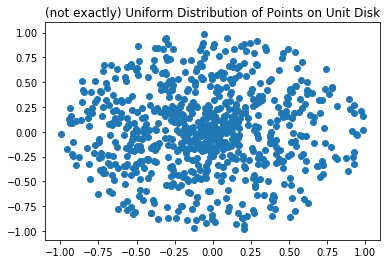

In [18]:
points = []

for i in range(1,800):
    r = random.uniform(0,1)
    theta = random.uniform(0, 2*pi)
    
    x = r * cos(theta)
    y = r * sin(theta)
    
    points.append((x,y))
    
plt.scatter(*zip(*points))
plt.title('(not exactly) Uniform Distribution of Points on Unit Disk')

Note that the point cloud clusters around the center. This is not a uniform distribution of points! The correct way to do this is by using $\sqrt{r}$ in lieu of $r$.

Text(0.5, 1.0, 'Uniform Distribution of Points on Unit Disk')

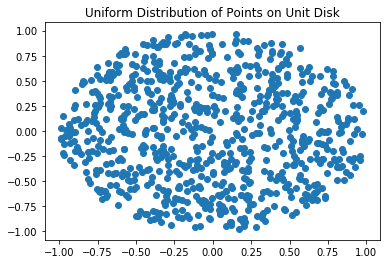

In [19]:
points = []

for i in range(1,800):
    r = random.uniform(0,1)
    theta = random.uniform(0, 2*pi)
    
    x = np.sqrt(r) * cos(theta)
    y = np.sqrt(r) * sin(theta)
    
    points.append((x,y))
    
plt.scatter(*zip(*points))
plt.title('Uniform Distribution of Points on Unit Disk')

Now let's define a new function `random_on_disk` to replace the `random_on_circle` function. This function serves the same purpose as `random_on_circle` though now it generates positions on the interior of circles of radii $r$. 

In [14]:
def random_on_disk(seed, r):
    theta = random.uniform(0, 2*pi)
    R = random.uniform(0, r)
    
    x = int(seed[0] + np.sqrt(R) * cos(theta))
    y = int(seed[1] + np.sqrt(R) * sin(theta))
    
    return x,y

Similarly, `random_on_box` generates a random point $(x,y)$ inside a box of side-length $N$.

In [31]:
def random_on_box(seed, N):
    x = int(random.uniform(seed[0] - N//2, seed[0] + N//2))
    y = int(random.uniform(seed[1] - N//2, seed[1] + N//2))
    return x,y

The goal is to run the same DLA program as above but with this new method of generating random walkers whose initial points are picked uniformly at random on each circle of radius $r$. 

Still working.  1  walkers have been released. Added:  0
Still working.  101  walkers have been released. Added:  1
Still working.  201  walkers have been released. Added:  3
Still working.  301  walkers have been released. Added:  4
Still working.  401  walkers have been released. Added:  5
Still working.  501  walkers have been released. Added:  8
Still working.  601  walkers have been released. Added:  8
Still working.  701  walkers have been released. Added:  13
Still working.  801  walkers have been released. Added:  14
Still working.  901  walkers have been released. Added:  19
Still working.  1001  walkers have been released. Added:  22
Still working.  1101  walkers have been released. Added:  24
Still working.  1201  walkers have been released. Added:  26
Still working.  1301  walkers have been released. Added:  31
Still working.  1401  walkers have been released. Added:  37
Still working.  1501  walkers have been released. Added:  39
Still working.  1601  walkers have been rel

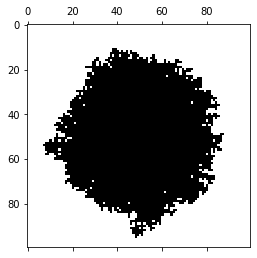

In [40]:
N = 100 # this can be changed. 
bounding_radius = 45
r = 2 # first circle is set to a radius of 2 around the seed particle; this is the first circle on which we generate a random walker
matrix = np.zeros((N,N))

matrix[50][50] = 1 # seed location at the center of grid
seed = (50, 50)

# this loop puts a 2 at all positions more than the bounding radius away from the seed point
for row in range(0, N):
    for col in range(0, N):
        if (seed[0] - col)**2 + (seed[1]-row)**2 > (bounding_radius)**2:  # ordinary distance function
            matrix[row][col] = 2
            
cmap = colors.ListedColormap(['white', 'black', 'white'])

clusterComplete = False   # boolean for when cluster is completed. Cluster is complete once it hits the bounding circle 

walkerCount = 0
addedCount = 0

while not clusterComplete:
    
    # need to update r each time : find the particle in the cluster at this iteration that is farthest from 
    # the seed particle. The distance between the seed and this farthest particle is the new radius of the 
    # circle on which we will spawn the next random walker
    
    walkerPos = random_on_box(seed, N) # release a walker at a position chosen uniformly at random on the interior of disk centered at the seed
    walkerCount += 1
    
    walkerStuck = False
    walkerAtEdge = False
    walkerTooFar = False
    
    while not walkerStuck and not walkerAtEdge and not walkerTooFar: # this is the loop that controls the random walk
        
        walkerAtEdge, walkerStuck = check_near(walkerPos, N, matrix)
        
        nextWalkerPos = walk(walkerPos, N, matrix)
        
        if walkerStuck:
            matrix[walkerPos[1]][walkerPos[0]] = 1
            addedCount += 1
            if (walkerPos[0]-seed[0])**2 + (walkerPos[1]-seed[1])**2 >= (bounding_radius)**2:
                clusterComplete = True
        else:
            walkerPos = nextWalkerPos
            if (walkerPos[0]-seed[0])**2 + (walkerPos[1]-seed[1])**2 >= (10*r)**2:
                walkerTooFar = True #if the walker exits the bounding circle, the walker is killed
                
    interval = range(1, 1000000, 100)
    
    if walkerCount in interval:
        print("Still working. ", walkerCount,
              " walkers have been released. Added: ", addedCount)
    if walkerCount == 1000000:
        print("Taking too long, breaking.")
        clusterComplete = True
        
plt.matshow(matrix, interpolation = 'nearest', cmap = cmap)
plt.show()

Something's wrong. Generating points uniformly at random on the interior of the circles and on the interior of the box just results in a blob. Why? 

At each iteration, there's a positive probability that a walker might spawn at a point that is inside a "valley" of the cluster, hence filling all these valleys. 

I think it's necessary that walkers are always spawning *outside* the circle? 

Ideas: 
* Spawn walkers on an **annulus** that is exterior to the walker at each iteration? 
* Spawn walkers in a region that is exterior to each circle of radius $r$?